As the launch of next generation gaming console around the corner, I think that it is nice to have an overview on the entire gaming market. I also want to have a deep analysis on how well the current generation consoles are doing, namely PS4 vs Xbox One.

This project is for gamers who are interested in gaming on the more popular platform and for developers who want to continue putting resources on current generation consoles. This analysis will offer insights on which platform has stronger player base and which platform sells more copies of games, as well as what kind of impact the current generation consoles could possibly have on the next generation consoles.

#### Part 1: Analysis of gaming market in general

In [251]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import *
import seaborn as sns
import sklearn

In [2]:
df1=pd.read_csv('https://raw.githubusercontent.com/dxljack/PS4orXOne/master/Gaming%20Console%20dataset/Hardware%20Yearly%20Sales.csv')

In [3]:
df1

,Year,PS4,XOne
0,2013,4430139,3075770
1,2014,14560282,7908581
2,2015,17510227,8631257
3,2016,17590843,8368621
4,2017,19808528,7644053
5,2018,18277267,6829443


In [4]:
df2=pd.read_csv('https://raw.githubusercontent.com/dxljack/PS4orXOne/master/Gaming%20Console%20dataset/Hardware%20Total%20Sales.csv')

In [5]:
df2

,Year,PS4,XOne
0,2013,4430139,3075770
1,2014,19045310,10984351
2,2015,36667145,19640765
3,2016,53490988,27924386
4,2017,73528627,34306680
5,2018,91805894,41136123


In [114]:
df3=pd.read_csv('https://raw.githubusercontent.com/dxljack/PS4orXOne/master/Gaming%20Console%20dataset/vgsales-12-4-2019-short.csv')

In [115]:
df3.head()

,Rank,Name,Genre,ESRB_Rating,Platform,Publisher,Developer,Critic_Score,User_Score,Total_Shipped,Global_Sales,NA_Sales,PAL_Sales,JP_Sales,Other_Sales,Year
0,1,Wii Sports,Sports,E,Wii,Nintendo,Nintendo EAD,7.7,NaN,82.86,NaN,NaN,NaN,NaN,NaN,2006.0
1,2,Super Mario Bros.,Platform,NaN,NES,Nintendo,Nintendo EAD,10.0,NaN,40.24,NaN,NaN,NaN,NaN,NaN,1985.0
2,3,Mario Kart Wii,Racing,E,Wii,Nintendo,Nintendo EAD,8.2,9.1,37.14,NaN,NaN,NaN,NaN,NaN,2008.0
3,4,PlayerUnknown's Battlegrounds,Shooter,NaN,PC,PUBG Corporation,PUBG Corporation,NaN,NaN,36.60,NaN,NaN,NaN,NaN,NaN,2017.0
4,5,Wii Sports Resort,Sports,E,Wii,Nintendo,Nintendo EAD,8.0,8.8,33.09,NaN,NaN,NaN,NaN,NaN,2009.0


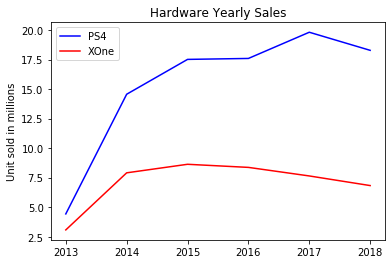

In [97]:
plt.plot(df1["Year"], df1["PS4"]/1000000, color='blue', label='PS4')
plt.plot(df1["Year"], df1["XOne"]/1000000, color='red', label='XOne')
plt.ylabel("Unit sold in millions")
plt.title('Console Yearly Sales')
plt.xticks(df1['Year'])
plt.legend(loc='best')
plt.show()

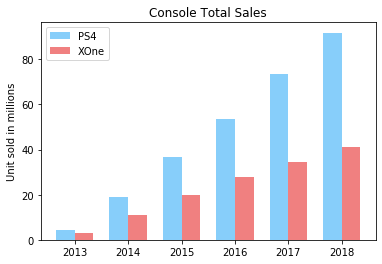

In [284]:
plt.bar(df2["Year"], df2["PS4"]/1000000, 0.35, label="PS4", color='lightskyblue')
plt.bar(df2["Year"]+0.35, df2["XOne"]/1000000, 0.35, label="XOne", color='lightcoral')
plt.ylabel("Unit sold in millions")
plt.title('Console Total Sales')
plt.xticks(df2['Year']+0.35/2, ('2013','2014','2015','2016','2017','2018'))
plt.legend(loc='best')
plt.show()

From early graphs, we can see that in term of sales, PS4 is in the lead compared to XOne.
Next, let us take a good of software in term of game sales, perhaps XOne will take the lead in this round.

In [116]:
df3.isnull().sum()

Rank                 0
Name                 0
Genre                0
ESRB_Rating      32169
Platform             0
Publisher            0
Developer           17
Critic_Score     49256
User_Score       55457
Total_Shipped    53965
Global_Sales     36377
NA_Sales         42828
PAL_Sales        42603
JP_Sales         48749
Other_Sales      40270
Year               979
dtype: int64

mask = (df3["Year"] >= 2013) & (df3["Year"] <= 2018)
df3=df3.loc[mask]
df3.head()

In [171]:
mask1 = (df3["Platform"] == 'PS4') | (df3["Platform"] == 'XOne') | (df3["Platform"] == 'PC')
df_3 = df3.loc[mask1]

In [172]:
df_3.head()

,Rank,Name,Genre,ESRB_Rating,Platform,Publisher,Developer,Critic_Score,User_Score,Total_Shipped,Global_Sales,NA_Sales,PAL_Sales,JP_Sales,Other_Sales,Year
3,4,PlayerUnknown's Battlegrounds,Shooter,NaN,PC,PUBG Corporation,PUBG Corporation,NaN,NaN,36.6,NaN,NaN,NaN,NaN,NaN,2017.0
20,21,Grand Theft Auto V,Action,M,PS4,Rockstar Games,Rockstar North,9.7,NaN,NaN,19.39,6.06,9.71,0.60,3.02,2014.0
34,35,Call of Duty: Black Ops 3,Shooter,M,PS4,Activision,Treyarch,NaN,NaN,NaN,15.09,6.18,6.05,0.41,2.44,2015.0
45,46,Red Dead Redemption 2,Action-Adventure,M,PS4,Rockstar Games,Rockstar Games,9.8,NaN,NaN,13.94,5.26,6.21,0.21,2.26,2018.0
50,51,Call of Duty: WWII,Shooter,M,PS4,Activision,Sledgehammer Games,8.0,NaN,NaN,13.40,4.67,6.21,0.40,2.12,2017.0


Because we really only care about Global_Sales, I will first replace missing value in Total_Shipped with 0, then replace missing value in Global_Sales with Total_Shipped.
Next, I will also replace missing values in Critic_Score with 0 for later use.

In [173]:
df_3["Total_Shipped"].fillna(0, inplace=True)

In [174]:
df_3["Global_Sales"].fillna(df_3["Total_Shipped"], inplace=True)

In [175]:
df_3["Critic_Score"].fillna(0, inplace=True)

Extract the columns we need for further exploration.

In [178]:
df_3=df_3[["Name", "Genre", "Platform", "Publisher", "Critic_Score", "Global_Sales", "Year"]]

In [179]:
df_3.head()

,Name,Genre,Platform,Publisher,Critic_Score,Global_Sales,Year
3,PlayerUnknown's Battlegrounds,Shooter,PC,PUBG Corporation,0.0,36.60,2017.0
20,Grand Theft Auto V,Action,PS4,Rockstar Games,9.7,19.39,2014.0
34,Call of Duty: Black Ops 3,Shooter,PS4,Activision,0.0,15.09,2015.0
45,Red Dead Redemption 2,Action-Adventure,PS4,Rockstar Games,9.8,13.94,2018.0
50,Call of Duty: WWII,Shooter,PS4,Activision,8.0,13.40,2017.0


Let us group the remaining data by Platform and compute the sum of sales.

In [205]:
df_31=df_3[["Platform", "Global_Sales"]].groupby("Platform").sum()

In [209]:
df_31.head()

,Global_Sales
Platform,
PC,415.32
PS4,643.99
XOne,295.43


Above is the Global_Sales from 2013 to 2018.

[Text(0, 0.5, 'Global sales in millions'), Text(0.5, 0, 'Platform')]

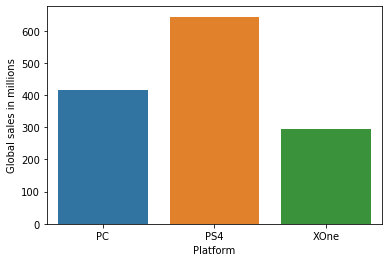

In [212]:
ax = sns.barplot(df_31.index, df_31["Global_Sales"])
ax.set(xlabel='Platform', ylabel='Global sales in millions')

If you would like to see the yearly breakdown, here it is.

In [243]:
df_32=df_3.groupby(["Platform", "Year"])["Global_Sales"].sum()

In [244]:
df_32=df_32.to_frame()
df_32

Global_Sales
Platform Year                
PC       2013.0         80.87
         2014.0         88.65
         2015.0         83.76
         2016.0         69.14
         2017.0         65.00
         2018.0         27.90
PS4      2013.0         26.96
         2014.0        106.03
         2015.0        132.43
         2016.0        130.34
         2017.0        138.56
         2018.0        109.67
XOne     2013.0         21.00
         2014.0         61.39
         2015.0         66.33
         2016.0         57.94
         2017.0         49.95
         2018.0         38.82

Text(0, 0.5, 'Global sales in millions')

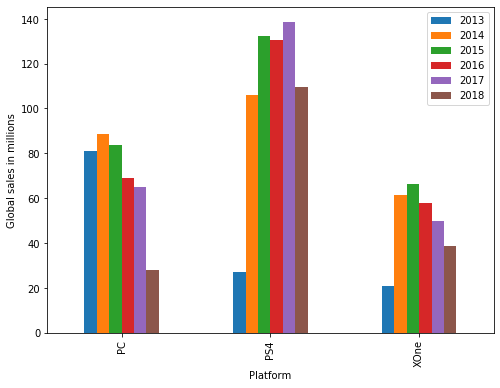

In [266]:
ax1 = df_32.unstack().plot(figsize=(8,6), kind='bar')
ax1.legend(["2013","2014","2015","2016","2017","2018"])
ax1.set_ylabel("Global sales in millions")

At this point, we can see that XOne isn't really doing all the well for this generation. For one, it falls behind PS4 every year. It even falls behind PC gaming by quite a margin.
Now let us take a look at the exact market share in term of game sales. Note that we cannot explore the market share in term of hardware sales, since we didnot take into account the PC sales.

In [261]:
df_33=df_31/df_31["Global_Sales"].sum()
df_33

,Global_Sales
Platform,
PC,0.306568
PS4,0.475361
XOne,0.218071


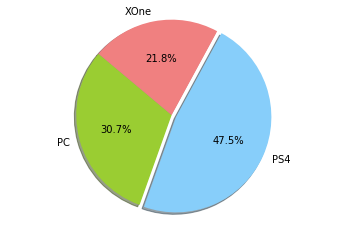

In [283]:
labels = 'PC', 'PS4', 'XOne'
sizes = df_33["Global_Sales"]
colors = ['yellowgreen', 'lightskyblue', 'lightcoral']
explode = (0, 0.05, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

ax2 = plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.show()

In summary, as far as current generation console goes, the winner is clearly the PS4. This will give a lot of confidence to the developers who will continue to make games for PS4 as time goes on, because even when the next generation launches, PS4 will still be supported many years to come. In addition, this will possibly promotes the sales of PS5 since the player base is high, it is very likely for those players to stay with PlayStation due to few main factors, including previous investments in games and friends in the same network, etc. This concludes the analysis on gaming market.

#### Part 2: Modeling and prediction on future game sales

We can start by finding what kind of game is most popular through the year. For simplicity, we will continue using df_3 which consists of games from 2013 to 2018.

In [412]:
top5_genre=df_3.groupby(['Genre'])['Global_Sales'].sum().sort_values(ascending=False).head(5)
top5_genre

Genre
Shooter             316.05
Action              271.43
Sports              162.20
Role-Playing        123.05
Action-Adventure    116.07
Name: Global_Sales, dtype: float64

In [413]:
top5_genre=top5_genre.to_frame()
top5_genre_df = df_3[df_3["Genre"].isin(top5_genre.index)]
top5_genre_df.head()

,Name,Genre,Platform,Publisher,Critic_Score,Global_Sales,Year
3,PlayerUnknown's Battlegrounds,Shooter,PC,PUBG Corporation,0.0,36.60,2017.0
20,Grand Theft Auto V,Action,PS4,Rockstar Games,9.7,19.39,2014.0
34,Call of Duty: Black Ops 3,Shooter,PS4,Activision,0.0,15.09,2015.0
45,Red Dead Redemption 2,Action-Adventure,PS4,Rockstar Games,9.8,13.94,2018.0
50,Call of Duty: WWII,Shooter,PS4,Activision,8.0,13.40,2017.0


In [414]:
top5_name=df_3.groupby(['Name'])['Global_Sales'].sum().sort_values(ascending=False).head(5)
top5_name

Name
Grand Theft Auto V               40.71
PlayerUnknown's Battlegrounds    39.10
Call of Duty: Black Ops 3        22.76
Call of Duty: WWII               19.82
Red Dead Redemption 2            19.71
Name: Global_Sales, dtype: float64

In [415]:
top5_name=top5_name.to_frame()
top5_name.head()

,Global_Sales
Name,
Grand Theft Auto V,40.71
PlayerUnknown's Battlegrounds,39.10
Call of Duty: Black Ops 3,22.76
Call of Duty: WWII,19.82
Red Dead Redemption 2,19.71


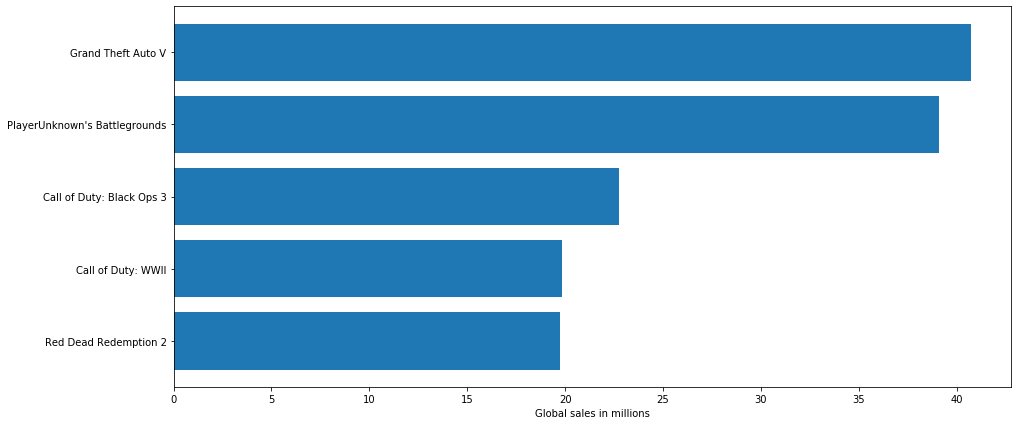

In [438]:
fig, ax2 = plt.subplots(figsize=(15,7))
plt.barh(top5_name.index, top5_name["Global_Sales"], align='center')
plt.xlabel('Global sales in millions')
ax2.invert_yaxis()
plt.show()

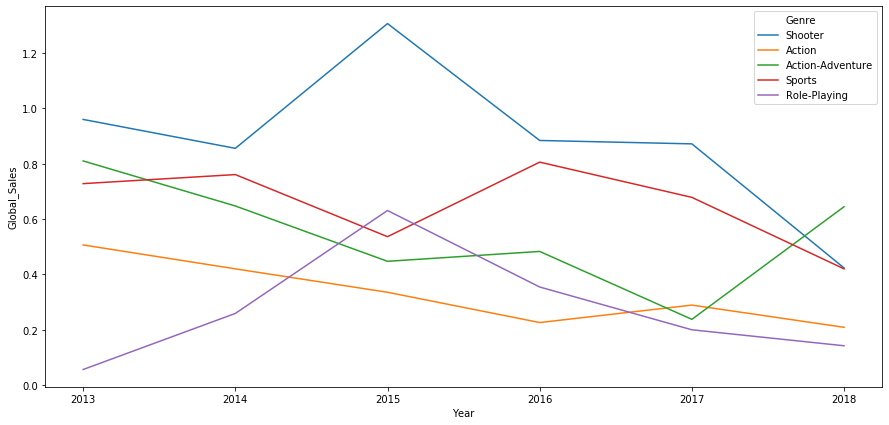

In [416]:
fig, ax3 = plt.subplots(figsize=(15,7))
sns.lineplot(x='Year', y='Global_Sales', hue='Genre', data=top5_genre_df, ci=None, ax=ax3)

In [417]:
top5_publisher=df_3.groupby(['Publisher'])['Global_Sales'].sum().sort_values(ascending=False).head(5)
top5_publisher

Publisher
Activision                                131.04
Electronic Arts                           113.34
Ubisoft                                   103.52
EA Sports                                  75.65
Warner Bros. Interactive Entertainment     73.14
Name: Global_Sales, dtype: float64

In [418]:
top5_publisher=top5_publisher.to_frame()
top5_publisher_df = df_3[df_3["Publisher"].isin(top5_publisher.index)]
top5_publisher_df.head()

,Name,Genre,Platform,Publisher,Critic_Score,Global_Sales,Year
34,Call of Duty: Black Ops 3,Shooter,PS4,Activision,0.0,15.09,2015.0
50,Call of Duty: WWII,Shooter,PS4,Activision,8.0,13.40,2017.0
68,FIFA 18,Sports,PS4,EA Sports,8.3,11.80,2017.0
76,FIFA 17,Sports,PS4,Electronic Arts,8.9,10.94,2016.0
97,Call of Duty: Black Ops IIII,Shooter,PS4,Activision,0.0,9.32,2018.0


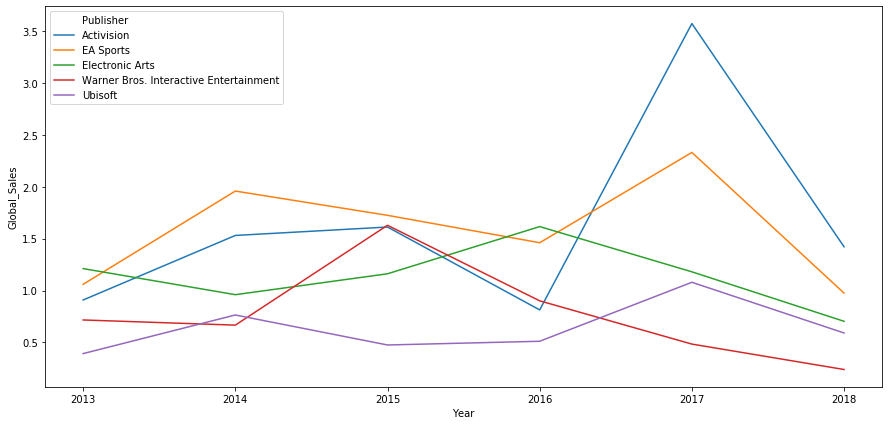

In [419]:
fig, ax4 = plt.subplots(figsize=(15,7))
sns.lineplot(x='Year', y='Global_Sales', hue='Publisher', data=top5_publisher_df, ci=None, ax=ax4)

Now that we know what kind of games are popular, we can proceed building a linear model to predict sales with selected features, namely Genre and Publisher

In [478]:
from sklearn.preprocessing import LabelEncoder
from sklearn import linear_model
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [472]:
le = LabelEncoder()
df_model = df_3[["Platform", "Genre", "Publisher", "Global_Sales"]]
df_model.head()

,Platform,Genre,Publisher,Global_Sales
3,PC,Shooter,PUBG Corporation,36.60
20,PS4,Action,Rockstar Games,19.39
34,PS4,Shooter,Activision,15.09
45,PS4,Action-Adventure,Rockstar Games,13.94
50,PS4,Shooter,Activision,13.40


In [476]:
labels = ["Platform", "Genre", "Publisher"]
for label in labels:
    temp = df_model[label]
    temp_encoded = le.fit_transform(temp)
    df_encoded[label] = temp_encoded
    
df_encoded["Global_Sales"] = df_model["Global_Sales"].values
df_encoded.head()

,Platform,Genre,Publisher,Global_Sales
3,0,15,625,36.60
20,1,0,693,19.39
34,1,15,28,15.09
45,1,1,693,13.94
50,1,15,28,13.40


In [508]:
regr = linear_model.LinearRegression()
scalar = StandardScaler()

X = df_encoded.iloc[:, 0:3]
X = scalar.fit_transform(X)
y = df_encoded.iloc[:,3:]
y = scalar.fit_transform(y)

regr.fit(X, y)
y_pred = regr.predict(X)
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y, y_pred))
# The r2 score
print('R2 Score: %.2f'
      % r2_score(y, y_pred))

Mean squared error: 0.99
R2 Score: 0.01


With train and test, the MSE is improved but R2 Score is still low.

In [509]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
regr.fit(X_train, y_train)
y_pred = regr.predict(X_test)
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y_test, y_pred))
# The r2 score
print('R2 Score: %.2f'
      % r2_score(y_test, y_pred))

Mean squared error: 0.64
R2 Score: 0.02


In summary, we have successfully predicted game global sales based on platform, genre and publisher. As you can see above, the MSE is low as we would prefer. Ideally, top genre games and top publisher games will have bigger sales as well as popular platform games. I'm sure there is room for improvement in the model, this is yet to be explored. For now, this concludes the modeling and predicting.

#### Part 3. Building a gamne recommender system

This time we will use features including platform, genre, publisher and critic score.
To be continued...